### Часть 1. Приоритизация гипотез.

In [48]:
# Импортирум необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# Опция 'max_colwidth' помогает увидеть неусеченную 
# форму вывода на экран каждого столбца
pd.set_option('display.max_colwidth', 200)

In [49]:
# Загрузим датасет
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv(r'C:\Users\User\OneDrive\Education\1_Ya_DA\13_decision_making_in_business\project_a_b_test\hypothesis.csv')

In [50]:
# Посмотрим первые десять строк датасета
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [51]:
# Выведем статистику датасета
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [52]:
# Приведём названия колонок к нижнему регистру в соответствии с хорошим стилем
hypothesis.columns = hypothesis.columns.str.lower()

In [53]:
# Добавим наименование гипотезы для наглядности
hypothesis = hypothesis.rename(index = lambda x: x+1)
hypothesis.index = 'Гипотеза ' + hypothesis.index.astype(str)
hypothesis

,hypothesis,reach,impact,confidence,efforts
Гипотеза 1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
Гипотеза 2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
Гипотеза 3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
Гипотеза 4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
Гипотеза 5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
Гипотеза 6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
Гипотеза 7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
Гипотеза 8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
Гипотеза 9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [54]:
# Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
round(hypothesis[['hypothesis', 'ice']].sort_values('ice', ascending=False), 2)                

,hypothesis,ice
Гипотеза 9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
Гипотеза 1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
Гипотеза 8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
Гипотеза 7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
Гипотеза 3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
Гипотеза 2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
Гипотеза 6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
Гипотеза 4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
Гипотеза 5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [55]:
# Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values('rice', ascending=False)                   

,hypothesis,rice
Гипотеза 8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
Гипотеза 3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
Гипотеза 1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
Гипотеза 7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
Гипотеза 9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
Гипотеза 4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
Гипотеза 2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
Гипотеза 6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
Гипотеза 5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод

При применении фреймворка ICE на первых трёх местах оказались:
- гипотеза 9 - запустить акцию, дающую скидку на товар в день рождения;
- гипотеза 1 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- гипотеза 8- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

При применении фреймворка RICE на первых трёх местах: 
- гипотеза 8 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- гипотеза 3 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- гипотеза 1 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Фреймворк RICE в отличае от фреймворка ICE, включает в себя параметр 'reach' (охват), который измеряется количеством людей/событий за период времени. При оценке гипотез фреймворком RICE, на первом месте гипотеза 8, её оценка более чем в два раза больше гипотезы 3, которая на втором месте. Предположу, что это явилось результатом применения параметра "reach". В фреймворке ICE параметр 'reach' не учитывается, поэтому гипотеза 8 оказалась на третьем месте.  
Приоритетными будут гипотезы 8, 3, 1.

### Часть 2. Анализ А/В-теста.

In [56]:
# Загрузим датасеты
try:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )
except:
    orders, visitors = (
        pd.read_csv(r'C:\Users\User\OneDrive\Education\1_Ya_DA\13_decision_making_in_business\project_a_b_test\orders.csv'),
        pd.read_csv(r'C:\Users\User\OneDrive\Education\1_Ya_DA\13_decision_making_in_business\project_a_b_test\visitors.csv')
    )

In [57]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [59]:
# Проверим датасет на наличие пропущенных значений
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [60]:
# Проверим датасет на наличие дубликатов
orders.duplicated().sum()

0

In [61]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [62]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [63]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [64]:
visitors.duplicated().sum()

0

In [65]:
# Преобразуем в колонке "date" временные данные
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Посмотрим, есть ли одни и те же пользователи в обеих группах датасета orders. Отфильтруем группы, найдём пользователей на пересечении групп, исключим их из датасета, чтобы не "портили" статистику.

In [66]:
# Отфильтруем группы методом query
groupA = orders.query('group == "A"')
groupB = orders.query('group == "B"')

In [67]:
# Посмотрим, какое количество пользователей находится на пересечении обоих групп
groupIntersection = list(np.intersect1d(groupA['visitorId'], groupB['visitorId']))
len(groupIntersection)

58

In [68]:
# Исключим пользователей находящихся в обоих группах
orders = orders.query('visitorId not in @groupIntersection')

Вывод

Загрузили данные, посмотрели первичную статистику - пропусков и дубликатов не обнаружили. Выявили 58 пользователей находящихся в обоих группах, исключили их. Переходим к анализу А/В теста.

#### Стабильность кумулятивных метрик
Чтобы исключить проблему подсматривания, проанализируем графики метрик. Изучим графики кумулятивных, или накапливаемых данных. По графику кумулятивных метрик определим, стоит останавливать тест или нет. 

In [69]:
# Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', 
# таблицы orders. Избавимся от дубликатов методом drop_duplicates().
datesGroups = orders[['date', 'group']].drop_duplicates()

In [70]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [71]:
# Объявим переменную ordersAggregated, содержащую: дату, группу A/B-теста и т.д.
ordersAggregated = (datesGroups
    .apply(
        lambda x: orders[np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg(
        {'date': 'max'
        , 'group': 'max'
        , 'transactionId': 'nunique'
        , 'visitorId': 'nunique'
        , 'revenue': 'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
    )

In [72]:
# Объявим переменную visitorsAggregated, содержащую: дату; группу A/B-теста и т.д.
visitorsAggregated = (datesGroups
    .apply(
        lambda x: visitors[np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg(
        {'date': 'max'
        , 'group': 'max'
        , 'visitors': 'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
    )

In [73]:
#  Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated 
# по колонкам 'date', 'group' методом merge()
cumulativeData = (ordersAggregated
    .merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
    )
# Добавим столбцы
cumulativeData.columns = [
    'date'
    , 'group'
    , 'orders'
    , 'buyers'
    , 'revenue'
    , 'visitors'
]


Получили датасет `cumulativeData` с колонками:
- `date` - дата;
- `group` - группа А/В-теста;
- `orders` - кумулятивное количество заказов на указанную дату включительно;
- `buyers` - кумулятивное количество уникальных  пользователей, совершивших хотя бы один заказ в группе, на указанную дату включительно;
- `revenue` - кумулятивная выручка заказов в группе по указанную дату включительно;
- `visitors` - кумулятивное количество посетителей интернет-магазина на указанную дату включительно.

### Часть 2. Анализ A/B-теста

1. Построим график кумулятивной выручки по группам.

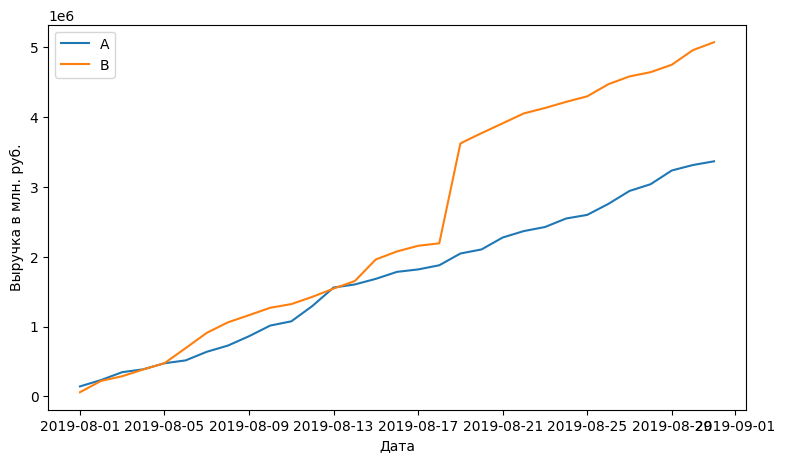

In [74]:
# Датафрейм с накопительным количеством заказов и накопительной выручкой 
# по дням в группе "А"
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
    ]

# Датафрейм с накопительным количеством заказов и накопительной выручкой 
# по дням в группе "B"
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
    ]
    
plt.figure(figsize=(9, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка в млн. руб.')
plt.legend()

Вывод

Выручка группы В больше выручки группы А. Выручка группы А растёт равномерно, выручка группы В растёт равномерно до определённого момента, далее резко вырастает и переходит в стабильный рост. "Взрывной" рост выручки группы В может сигнализировать нам о росте числа заказов, либо о появлении очень дорогих заказов в рассматриваемом периоде.

2. Построим график кумулятивного среднего чека по группам. 

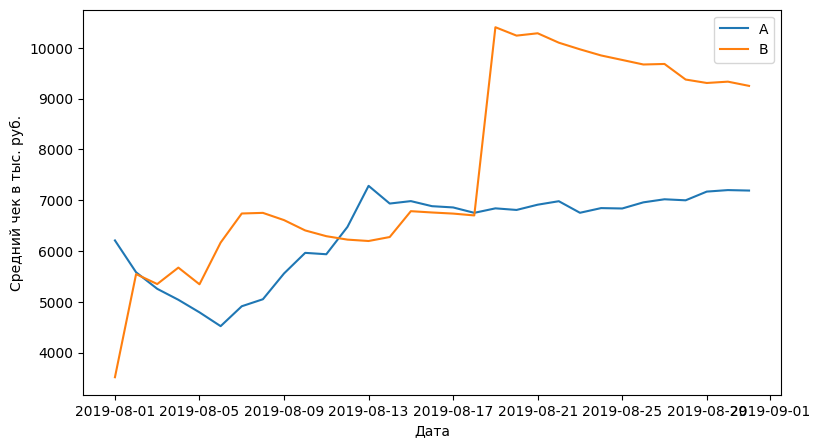

In [75]:
plt.figure(figsize=(9,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / 
cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / 
cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек в тыс. руб.')
plt.legend()

Вывод

Средний чек группы А показывает падение вначале и рост в середине тренда, после чего умеренное движение к росту. Средний чек группы В показывает рост вначале и всплеск в середине тренда (крупные заказы). Нужно посмотреть детальнее на данные, что мы и сделаем на следующем графике.

3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Text(0, 0.5, 'Отношение кумулятивного среднего чека группы "В" к группе "А"')

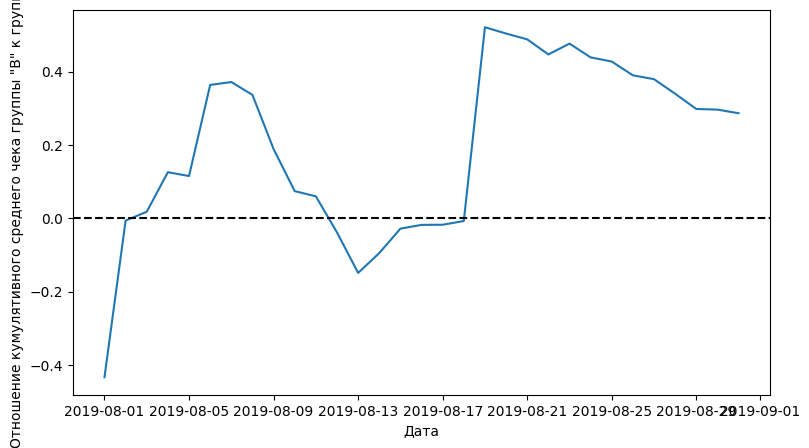

In [76]:
# Объединим таблицы методом merge() и сохраним в переменной mergedCumulativeRevenue
mergedCumulativeRevenue = (cumulativeRevenueA
    .merge(cumulativeRevenueB
        , left_on='date'
        , right_on='date'
        , how='left'
        , suffixes=['A', 'B'])
        )

plt.figure(figsize=(9, 5))

plt.plot(mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1
    )

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивного среднего чека группы "В" к группе "А"')

Вывод

График подтверждает предыдущий вывод: по соотношению среднего чека видно, что в группу "В" попали крупные заказы - резкий рост в середине тренда.

4. Построим график кумулятивного среднего количества заказов на посетителя по группам.

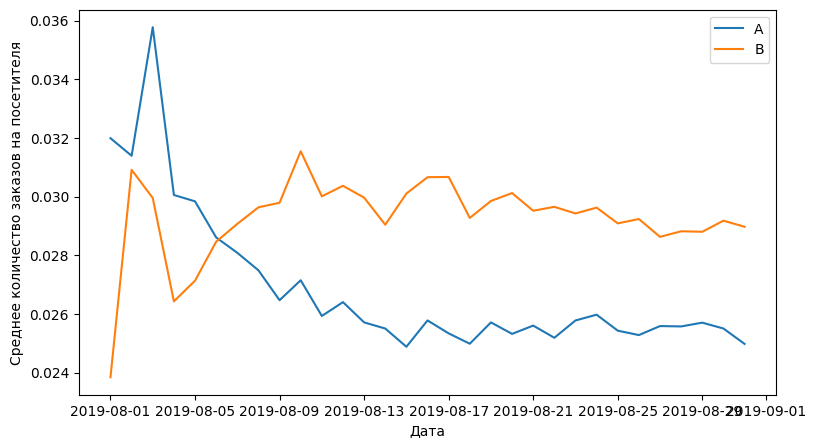

In [77]:
cumulativeVisitorsA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'visitors', 'orders']
    ]

cumulativeVisitorsB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'visitors', 'orders']
    ]


plt.figure(figsize=(9,5))

plt.plot(cumulativeVisitorsA['date'], cumulativeVisitorsA['orders'] / 
cumulativeVisitorsA['visitors'], label='A')
plt.plot(cumulativeVisitorsB['date'], cumulativeVisitorsB['orders'] / 
cumulativeVisitorsB['visitors'], label='B')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()

Видим всплеск вначале и пересечение групп в одной точке, после чего группа В "ушла в рост" с незначительными колебаниями и понижением тренда в конце, в то время как группа А "пошла на понижение" тренда с незначительными колебаниями и понижением тренда более глубоким чем у группы А. Посмотрим на относительные изменения на следующем графике.

5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Text(0, 0.5, 'Отношение зказов группы "В" к группе "А"')

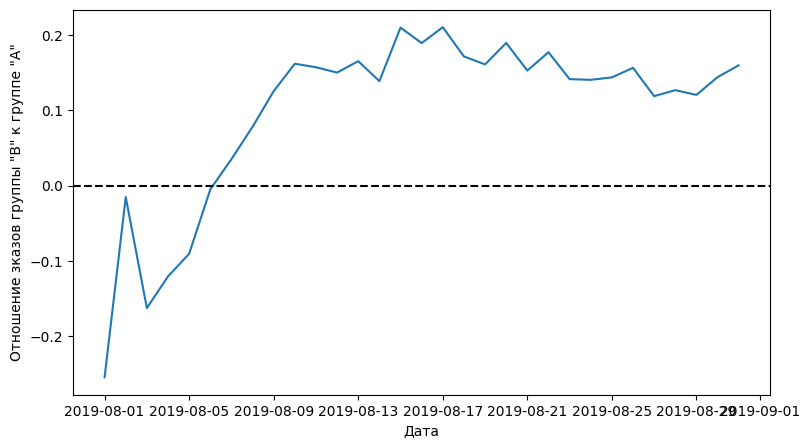

In [78]:
mergedCumulativeVisitors = (cumulativeVisitorsA
    .merge(cumulativeVisitorsB
        , left_on='date'
        , right_on='date'
        , how='left'
        , suffixes=['A', 'B'])
        )

plt.figure(figsize=(9, 5))

plt.plot(mergedCumulativeVisitors['date'], 
    (mergedCumulativeVisitors['ordersB'] / mergedCumulativeVisitors['visitorsB']) / 
    (mergedCumulativeVisitors['ordersA'] / mergedCumulativeVisitors['visitorsA']) - 1
    )

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение зказов группы "В" к группе "А"')

Вывод

График подтверждает предположение предыдущего вывода о преобладании среднего количества заказов на посетителя группы B к группе A. Посмотрим на аномалии, возможно, они изменят картину.

6. Постройте точечный график количества заказов по пользователям.

In [79]:
# Вернём в переменную результат работы методов группировки, аггрегации, 
# переименования, сортировки таблицы orders
ordersByUsers = (orders
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
    .rename(columns={'visitorId': 'users', 'transactionId': 'orders'})
    .sort_values(by='orders', ascending=False)
    )

Text(0.5, 1.0, 'График количества заказов по пользователям')

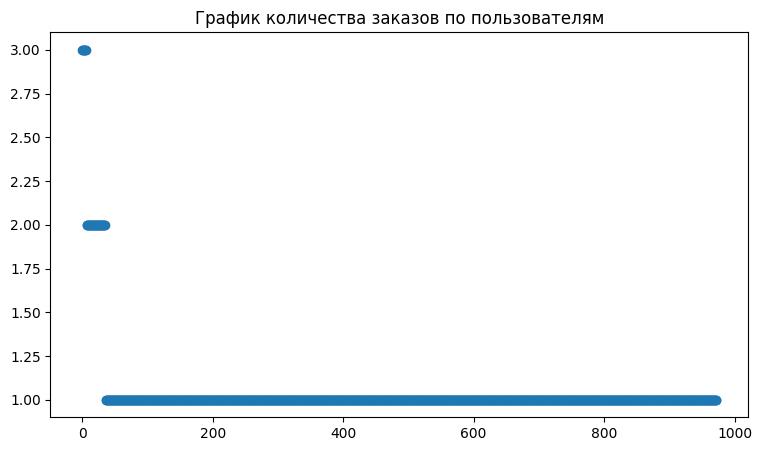

In [80]:
# Переменная с результатом работы серии из чисел от 0 до 
# количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(9, 5))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')

Вывод

Большинство пользователей делает один заказ, немногие пользователи делают два - три заказа.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

In [81]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([1., 2.])

Вывод

Не более пяти процентов пользователей делают два заказа и не более одного процента пользователей делают три заказа. 

Выберем два заказа как границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов.

Text(0.5, 1.0, 'График стоимостей заказов')

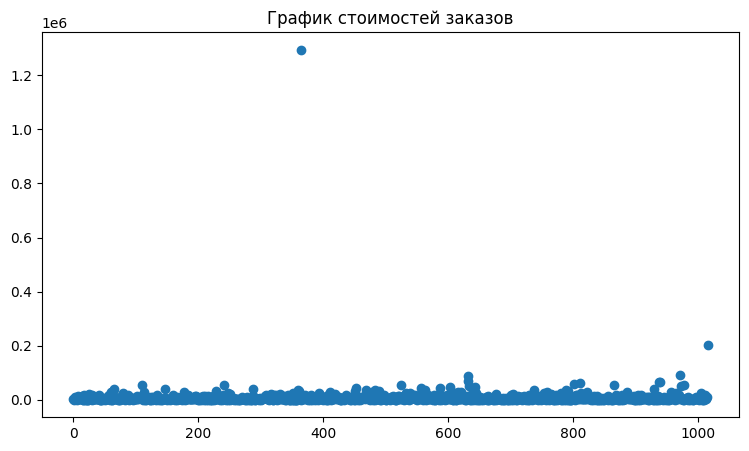

In [82]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(9, 5))

plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')

Вывод

В основном, сумма заказа не превышает 10 000 у. е., есть исключения в ~ 20 000 у. е. и более.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [83]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Вывод

Пять процентов заказов не превышают сумму в 26 785 у. е. и один процент заказов не превышает сумму 53 904 у. е.

Выберем 53 904 у. е. как границу для опраеделения аномальных заазов.

10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Подготовим данные для статистических тестов.  

In [84]:
# Сгруппируем посетителей по дням и получим кумулятивные данные о посетителях 
# по группе А 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [85]:
# Сгруппируем посетителей по дням и получим кумулятивные данные о посетителях 
# по группе В 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
    .agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [86]:
# Сгруппируем количество заказов и выручку по дням и получим кумулятивные данные 
# по группе А 
ordersADaily = (orders
                .query('group == "A"')
                 .groupby('date', as_index=False)
                 .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
    .agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

In [87]:
# сгруппируем количество заказов и выручку по дням и получим кумулятивные данные 
# по группе B
ordersBDaily = (orders
                .query('group == "B"')
                 .groupby('date', as_index=False)
                 .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
    .agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

Объединим данные в единую таблицу, где:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [88]:
# Объединим данные в единую таблицу
data = (
    ordersADaily
    .merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Сформируем нулевую и альтернативную гипотезы
- Н0: различий в среднем количестве заказов на посетителя между группами нет
- Н1: различия в среднем количестве заказов на посетителя между группами есть

In [89]:
# Сгруппируем заказы по пользователям для группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# сгруппируем заказы по пользователям для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [90]:
# Выделим все заказы и число пользователей в том числе пользователей,
# которые не сделали ни одного заказа
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                                 ), name='orders')
    ],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                                 ), name='orders')
    ],axis=0)

In [91]:
# Выведем относительный прирост в среднем количестве заказав пользователей группы B: 
# среднее количество заказов пользователей группы B / 
# среднее количество заказов пользователей группы А - 1
alpha = .05

results = stats.mannwhitneyu(sampleA, sampleB)

print('p-value: ' + '{0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Относительное изменение группы В к группе А составляет: {:.2%}'
      .format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Отвергаем нулевую гипотезу
Относительное изменение группы В к группе А составляет: 15.98%


Вывод

p-value меньше 0.05, нулевую гипотезу отвергаем, так как статистически значимые различия в среднем количестве заказов на пользователя между группами - есть. Относительный прирост в среднем количестве заказов пользователей группы В к пользователям группы А - 15.98 %.

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [92]:
alpha = .05

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-value: ' + '{0:.3f}'.format(results.pvalue))

print('Относительное различие в среднем чеке: ' + '{0:.2%}'.format(
    orders[orders['group']=='B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.829
Относительное различие в среднем чеке: 28.66%
Не получилось отвергнуть нулевую гипотезу


Вывод

p-value больше 0.05, оставляем нулевую гипотезу, так как нет статистически значимых различий в среднем чеке между группами. Относительное различие среднего чека между группами 28,7 %.

12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Ранее определили границу количества аномальных заказов - 2 и границу суммы аномальных заказов - 53 904 у. е. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы на сумму больше 53 904 у. е. — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [93]:
a = np.percentile(ordersByUsers['orders'], [99])
a

array([2.])

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.array(a)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.array(a)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print(abnormalUsers.shape[0])

Вывод

16 аномальных пользователей.

Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

In [ ]:
# Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним 
# очищенные данные о заказах — не включая аномальных пользователей.  
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
# Выведем p-value для сравнения среднего между очищенными группами. 
# Округлим p-value до пяти знаков после запятой. Выведем относительный 
# прирост среднего очищенной группы B, округлив до трёх знаков после запятой.
# print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
alpha = .05

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: ' + '{0:.3f}'.format(results.pvalue))
print('Относительный прирост конверсии группы B по отношению к группе A: ' + 
      '{0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Вывод

p-value меньше 0.05 - различия есть. Как с "сырыми" данными так и с "очищенными" статистическая значимость достигнута - сегмент группы В лучше сегмента А. Относительный прирост группы В к группе А - 18,92 %.

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [ ]:
# Выведем p-value для сравнения средних чеков между очищенными группами. 
# Округлим p-value до трёх знаков после запятой. Выведем относительный прирост 
# среднего чека очищенной группы B, округлив до трёх знаков после запятой.
result = stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == "A",
            np.logical_not(orders['visitorId'].isin(abnormalUsers))
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == "B",
            np.logical_not(orders['visitorId'].isin(abnormalUsers))
        )
    ]['revenue'] 
)

print('p-value: ' + '{0:.3f}'.format(results[1]))
    
print('Относительный прирост группы B относительно группы A по очищеным данным: ' +
      '{0:.2%}'.format(
          orders[
              np.logical_and(
                  orders['group'] == "B",
                  np.logical_not(orders['visitorId'].isin(abnormalUsers)),
              )
          ]['revenue'].mean() 
          / orders[
              np.logical_and(
                  orders['group'] == "A",
                  np.logical_not(orders['visitorId'].isin(abnormalUsers)),
              )
          ]['revenue'].mean() 
          - 1
      )
)
    
if result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Вывод

По очищенным данным различий в средних чеках в группах A и B не значимы. Относительное различие среднего чека между группами - 3.34 %.

---

14. Принимаем решение по результатам теста. Варианты решений:
-  Остановить тест, зафиксировать победу одной из групп.
-  Остановить тест, зафиксировать отсутствие различий между группами.
-  Продолжить тест.

Графики кумулятивной выручки и среднего чека показали, что результаты группы В лучше группы А - выручка выше а средний чек больше.

Статистическая значимость на "сырых" и "очищенных" данных показала, что есть различия в конверсии между группами, а в среднем чеке нет.

Делаем вывод, что резудьтаты группы В лучше результатов группы А.   
Фиксируем успех группы В, останавливаем тест.